Dataset Loaded Successfully
Feature Shape: (1797, 64)
Label Shape: (1797,)


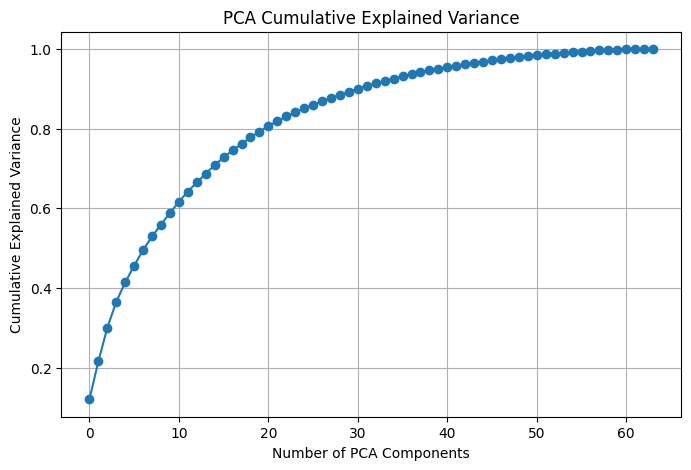

Baseline Accuracy (No PCA): 0.9722222222222222

Accuracy Comparison:
  PCA Components  Explained Variance  Accuracy
0              2            0.215950  0.538889
1             10            0.588738  0.897222
2             30            0.893208  0.961111
3             50            0.982759  0.972222
4         No PCA            1.000000  0.972222

Reduced Dataset Saved Successfully


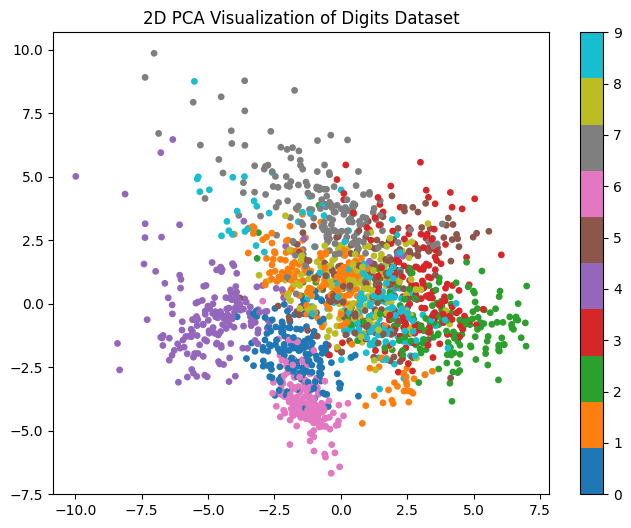


TASK 13 COMPLETED SUCCESSFULLY!
All outputs saved inside 'outputs/' folder


In [1]:
# ============================================
# Task 13: PCA – Dimensionality Reduction
# Dataset: Sklearn Digits
# Tool: Python, Scikit-learn, Matplotlib
# ============================================

# ----------- 1. IMPORT LIBRARIES --------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ----------- 2. CREATE OUTPUT DIRECTORIES -----
os.makedirs("outputs/plots", exist_ok=True)
os.makedirs("outputs/data", exist_ok=True)
os.makedirs("outputs/results", exist_ok=True)

# ----------- 3. LOAD DATASET ------------------
digits = load_digits()
X = digits.data        # Flattened images (1797 x 64)
y = digits.target

print("Dataset Loaded Successfully")
print("Feature Shape:", X.shape)
print("Label Shape:", y.shape)

# ----------- 4. FEATURE SCALING ---------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------- 5. PCA VARIANCE ANALYSIS ----------
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid(True)

plt.savefig("outputs/plots/pca_explained_variance.png")
plt.show()

# ----------- 6. BASELINE MODEL (NO PCA) --------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

baseline_model = LogisticRegression(max_iter=2000)
baseline_model.fit(X_train, y_train)

baseline_accuracy = accuracy_score(
    y_test, baseline_model.predict(X_test)
)

print("Baseline Accuracy (No PCA):", baseline_accuracy)

# ----------- 7. PCA + LOGISTIC REGRESSION ------
pca_components = [2, 10, 30, 50]
results = []

for n in pca_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_pca, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(max_iter=2000)
    model.fit(X_train_pca, y_train_pca)

    accuracy = accuracy_score(
        y_test_pca, model.predict(X_test_pca)
    )

    results.append([
        n,
        np.sum(pca.explained_variance_ratio_),
        accuracy
    ])

# ----------- 8. SAVE ACCURACY COMPARISON -------
results_df = pd.DataFrame(
    results,
    columns=["PCA Components", "Explained Variance", "Accuracy"]
)

results_df.loc[len(results_df)] = [
    "No PCA", 1.0, baseline_accuracy
]

results_df.to_csv(
    "outputs/results/pca_accuracy_comparison.csv",
    index=False
)

print("\nAccuracy Comparison:")
print(results_df)

# ----------- 9. SAVE REDUCED DATASET -----------
best_pca = PCA(n_components=30)
X_reduced = best_pca.fit_transform(X_scaled)

reduced_df = pd.DataFrame(X_reduced)
reduced_df["label"] = y

reduced_df.to_csv(
    "outputs/data/reduced_digits_pca30.csv",
    index=False
)

print("\nReduced Dataset Saved Successfully")

# ----------- 10. PCA 2D VISUALIZATION ----------
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=y, cmap="tab10", s=15
)
plt.colorbar(scatter)
plt.title("2D PCA Visualization of Digits Dataset")

plt.savefig("outputs/plots/pca_2d_scatter.png")
plt.show()

# ----------- 11. FINAL MESSAGE ----------------
print("\nTASK 13 COMPLETED SUCCESSFULLY!")
print("All outputs saved inside 'outputs/' folder")